In [133]:
#Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Settings
sns.set()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)
pd.options.display.float_format= '{:.2f}'.format

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Import CSV

df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007


# Data Validation

1) ¿Qué tipo de dato son las variables del conjunto de datos?

2) ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

3) ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

4) ¿Existen valores nulos explícitos en el conjunto de datos?

5) De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?
6) ¿Cuántos valores nulos tenemos en total en el conjunto de datos?
7) ¿Cuál es la proporción de valores nulos por cada variable?
8) ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?
9) ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [135]:
# 1
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [136]:
# 2
(df
 .dtypes
 .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

In [137]:
# 3
print('the dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

the dataset has 344 rows and 8 columns


In [138]:
# 4 & 5
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [139]:
# 6
print('Null Values -> {}'.format(df.isnull().sum().sum()))

Null Values -> 19


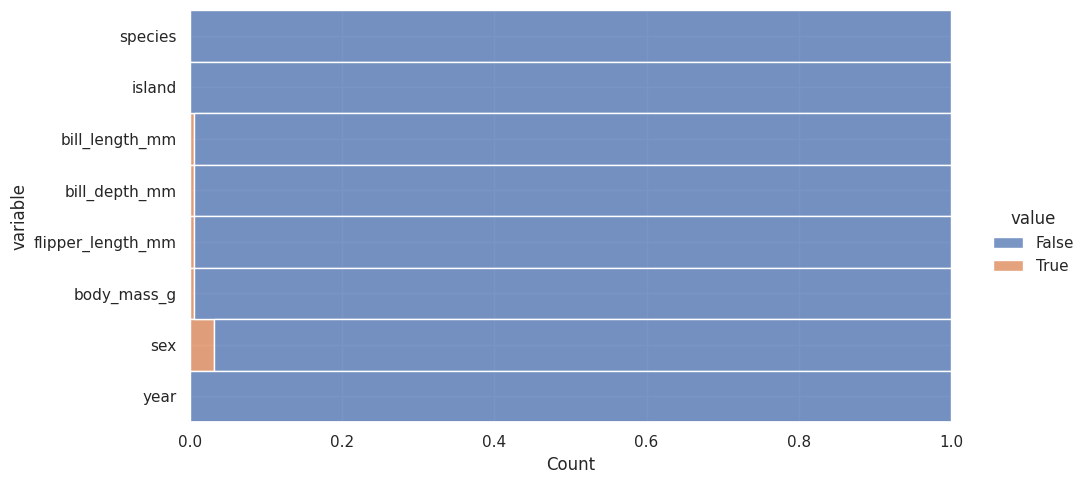

In [140]:
# 7 & 8
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df_null:(sns.displot(
                   data=df_null,
                   y='variable',
                   hue='value',
                   multiple='fill',
                   aspect=2)
                        )
    )
)
plt.show()

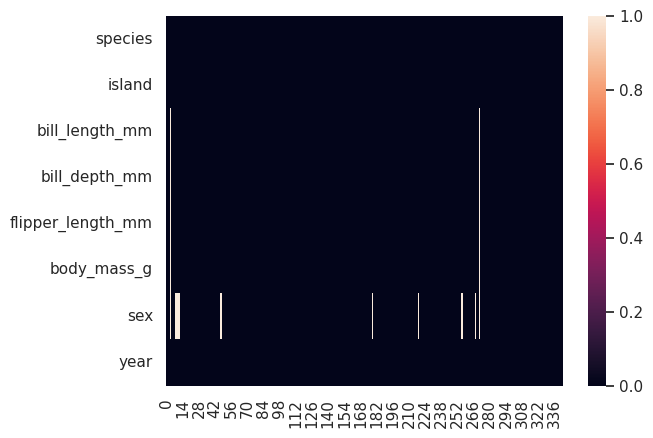

In [141]:
# 8
(   
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df_null:(
            sns.heatmap(
                data=df_null
            )
        )

    )
)
plt.show()

In [142]:
# 9
print('Number of rows removing null records-> {}'.format(df.shape[0]-df.dropna().shape[0]))

Number of rows removing null records-> 11


# Concusion
#### The number of null values wasn't significant so we decided to eliminate them.

In [143]:
sex=df['sex'].value_counts()
shape=df.shape

print(' Total Male -> {} \n Total Female -> {} \n Total "nan" -> {}'.format(sex[0],sex[1],shape[0]-sex[0]-sex[1]))
df=df.dropna()

 Total Male -> 168 
 Total Female -> 165 
 Total "nan" -> 11


## Change variable type

In [144]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [145]:
df = (
    df.astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
)

In [146]:
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [147]:
df.describe(include='category').transpose()

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,male,168


In [148]:
df.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60
bill_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00
year,333.00,2008.04,0.81,2007.00,2007.00,2008.00,2009.00,2009.00


## visualize variables

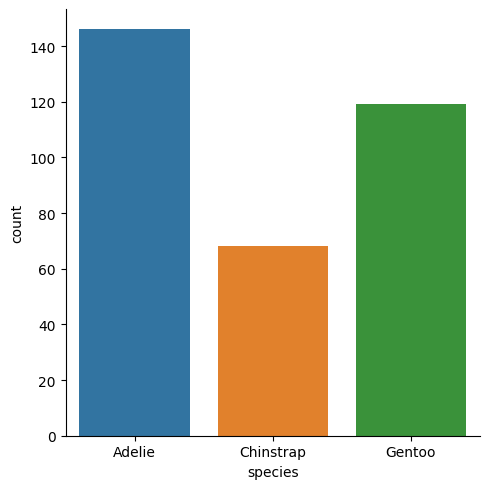

In [117]:
sns.catplot(data=df,
            x='species',
            kind='count'
            )
plt.show()

In [126]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

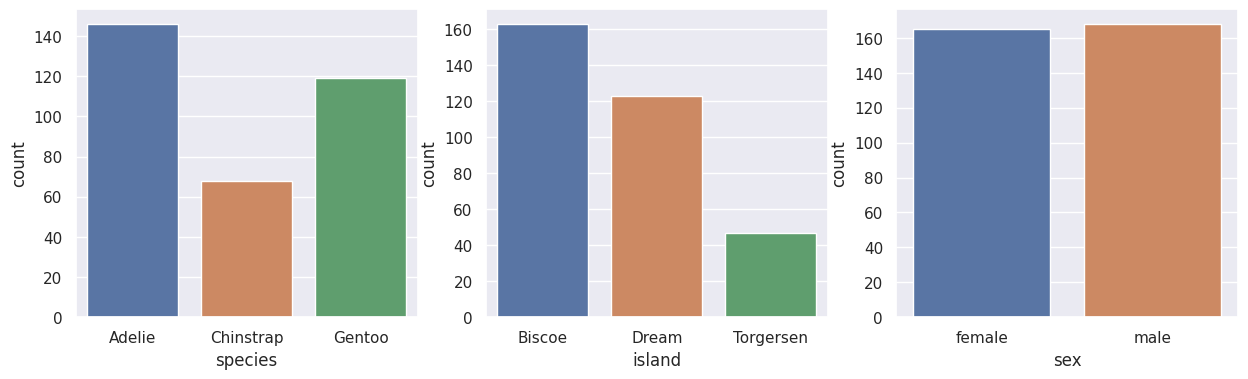

In [164]:
categories=df.select_dtypes('category').columns
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in range(len(categories)):
    (
        df
        .value_counts(categories[i],sort=True)
        .reset_index(name='count')
        .pipe(
            lambda df_count:(
                sns.barplot(
                    ax=ax[i],
                    data=df_count,
                    x = categories[i],
                    y='count'
                )
            )
                
        )
    )

In [155]:
df_categories=df.select_dtypes('category')
categories=df.select_dtypes('category').columns

In [151]:
def pivot_table(data,columns,count):

    for i in columns:
        d = data.pivot_table(index= i, values=count, margins=True,margins_name='Total',aggfunc='count')
        d['%']=d/data.shape[0]
        d['%']=round(d['%'].astype(float),2)
        print(i)
        print('')
        print(d.sort_values(by=count,ascending=True))
        print('\n')

In [154]:
pivot_table(df,categories,'year')

species

           year    %
species             
Chinstrap    68 0.20
Gentoo      119 0.36
Adelie      146 0.44
Total       333 1.00


island

           year    %
island              
Torgersen    47 0.14
Dream       123 0.37
Biscoe      163 0.49
Total       333 1.00


sex

        year    %
sex              
female   165 0.50
male     168 0.50
Total    333 1.00




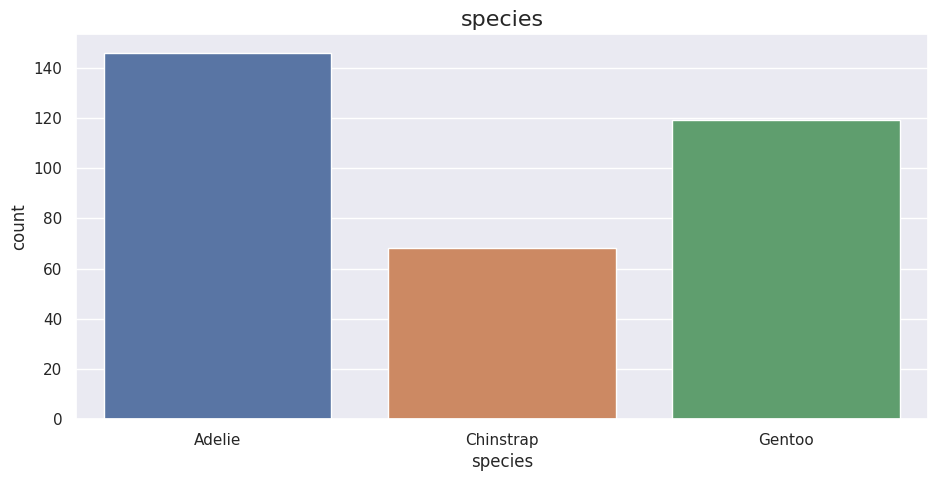

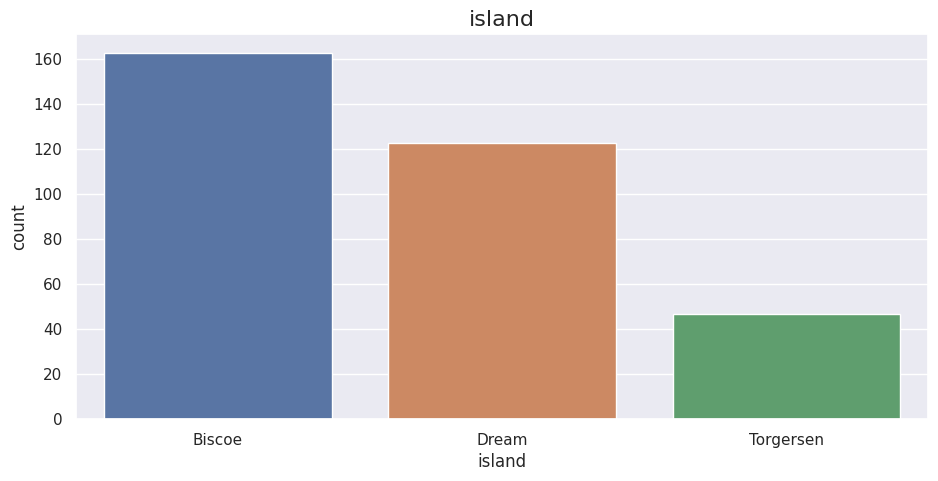

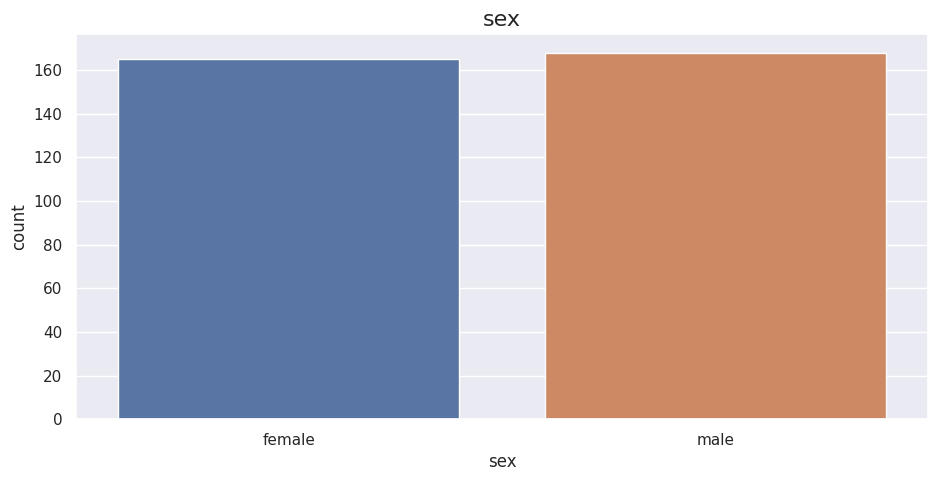

In [163]:
for i in df_categories:
    plt.figure(figsize=(11,5))
    plt.title(i,fontsize=16)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(x=df_categories[i])
    plt.show()